# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

* Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/
* Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

Finally, if you'd like to get started with Tensorflow, you can read through this tutorial: https://www.tensorflow.org/tutorials/keras/basic_classification. It uses a dataset called "fashion_mnist", which is identical in structure to the original digit mnist, but uses images of clothing rather than images of digits. The number of training examples and number of labels is the same. In fact, you can simply replace the code that loads "fashion_mnist" with "mnist" and everything should work fine.

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that the data gets partitioned into training, development, and test sets. Also, a small subset of the training data called mini_train_data and mini_train_labels gets defined, which you should use in all the experiments below, unless otherwise noted.

In [2]:
# Load the digit data from https://www.openml.org/d/554 or from default local location '~/scikit_learn_data/...'
X, Y = fetch_openml(name='mnist_784', return_X_y=True, cache=False)


# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


# Part 1:

Show a 10x10 grid that visualizes 10 examples of each digit.

Notes:
* You can use `plt.rc()` for setting the colormap, for example to black and white.
* You can use `plt.subplot()` for creating subplots.
* You can use `plt.imshow()` for rendering a matrix.
* You can use `np.array.reshape()` for reshaping a 1D feature vector into a 2D matrix (for rendering).

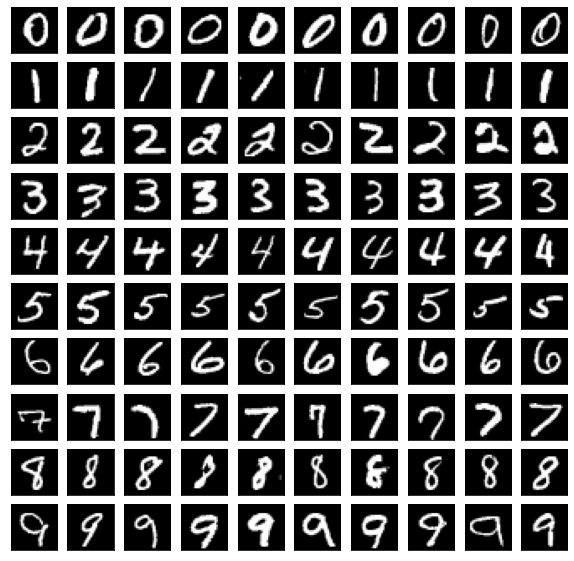

In [148]:
#def P1(num_examples=10):

### STUDENT START ###
fig, ax = plt.subplots(10,10, sharex=True, sharey=True, figsize=(10,10))
plt.setp(ax, xticks=[], yticks=[])
for i in range(10):
    location = np.where(mini_train_labels == str(i))
    j = 0
    for x in location[0]:
        if j == 10:
            break
        else:
            image = mini_train_data[x]
            img_shape = image.reshape(28, 28)
            ax[i,j].imshow(img_shape, cmap="gray", aspect="equal")
            j += 1           
plt.show()
### STUDENT END ###

#P1(10)

### Part 2:

Produce k-Nearest-Neighbors model with k = [1,3,5,7,9].  Evaluate and show the performance of each model. For the 1-Nearest Neighbor model, show precision, recall, and F1 for each label. Which is the most difficult digit?

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `classification_report` to get precision, recall, and F1 results.

In [17]:
#def P2(k_values):

### STUDENT START ###
# Forming the model for kNN when k = [1, 3, 5, 7, 9]
for k in [1, 3, 5, 7, 9]:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(mini_train_data, mini_train_labels)
    predicted_label = model.predict(dev_data)
    # Measuring performance by number of wrong out of 1000
    number_wrong = (predicted_label != dev_labels)

    print("Percentage of incorrect predictions for k =", str(k), "model:", np.sum(number_wrong)/np.size(mini_train_labels))
print("")

# Forming classification report for k=1 kNN model
model_1 = KNeighborsClassifier(n_neighbors=1)
model_1.fit(mini_train_data, mini_train_labels)
predict_model_1 = model_1.predict(dev_data)
# Getting individual labels in mini_train_labels for label_names
model_1_labels = np.unique(mini_train_labels)

print("Classification report for kNN model when k=1")
# Classification_report(true_labels, predicted_labels, label_names)
print(classification_report(dev_labels, predict_model_1, model_1_labels))

### STUDENT END ###

#k_values = [1, 3, 5, 7, 9]
#P2(k_values)

Percentage of incorrect predictions for k = 1 model: 0.116
Percentage of incorrect predictions for k = 3 model: 0.124
Percentage of incorrect predictions for k = 5 model: 0.118
Percentage of incorrect predictions for k = 7 model: 0.123
Percentage of incorrect predictions for k = 9 model: 0.125

Classification report for kNN model when k=1
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       106
           1       0.89      0.98      0.93       118
           2       0.90      0.79      0.84       106
           3       0.93      0.87      0.90        97
           4       0.91      0.85      0.88        92
           5       0.86      0.88      0.87        88
           6       0.92      0.92      0.92       102
           7       0.85      0.94      0.89       102
           8       0.83      0.77      0.80        94
           9       0.80      0.86      0.83        95

    accuracy                           0.88      1000
   macro 

/home/jorge/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass labels=['0' '1' '2' '3' '4' '5' '6' '7' '8' '9'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


ANSWER:

### Part 3:

Produce 1-Nearest Neighbor models using training data of various sizes.  Evaluate and show the performance of each model.  Additionally, show the time needed to measure the performance of each model.

Notes:
* Train on the train set.
* Evaluate on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `time.time()` to measure elapsed time of operations.

In [27]:
#def P3(train_sizes, accuracies):

### STUDENT START ###
# Making different training data sizes
train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]

# List used for part 4 to capture accuracy of models
accuracy_y = []

model = KNeighborsClassifier(n_neighbors=1)
# Loops for testing the different training data sizes
for i in train_sizes:
    # Used to determine execution time
    start_time = time.time()
    
    model.fit(train_data[:i], train_labels[:i])
    predict_labels = model.predict(dev_data)
    # Performance evalutated by number of incorrect predictions
    number_wrong_predict = (predict_labels != dev_labels)
    
    end_time = time.time()
    
    print(" Training data size", str(i), "Percentage of incorrect predictions:",
          np.sum(number_wrong_predict)/ np.size(dev_labels))
    # Determines execution time for each training data size
    print("Execution time:", round(end_time - start_time, 4), "sec")
    # Calculate accuracy of model
    accuracy_y.append(1 - (np.sum(number_wrong_predict)/ np.size(dev_labels)))
    
### STUDENT END ###

#train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
#accuracies = []
#P3(train_sizes, accuracies)

 Training data size 100 Percentage of incorrect predictions: 0.298
Execution time: 0.2326 sec
 Training data size 200 Percentage of incorrect predictions: 0.209
Execution time: 0.3979 sec
 Training data size 400 Percentage of incorrect predictions: 0.189
Execution time: 0.7769 sec
 Training data size 800 Percentage of incorrect predictions: 0.134
Execution time: 1.5352 sec
 Training data size 1600 Percentage of incorrect predictions: 0.095
Execution time: 3.0932 sec
 Training data size 3200 Percentage of incorrect predictions: 0.073
Execution time: 6.1145 sec
 Training data size 6400 Percentage of incorrect predictions: 0.061
Execution time: 12.7315 sec
 Training data size 12800 Percentage of incorrect predictions: 0.048
Execution time: 26.1445 sec
 Training data size 25600 Percentage of incorrect predictions: 0.037
Execution time: 52.3972 sec


### Part 4:

Produce a regression model that predicts accuracy of a 1-Nearest Neighbor model given training set size. Show $R^2$ of the regression model and the accuracies it predicts for training set sizes 60000, 120000, and 1000000.  Show a lineplot of the actual accuracies and predicted accuracies vs. training set size.  What's wrong with using regression here?

Apply some transformation that makes the predictions more reasonable.  Show $R^2$ of the improved regression model and the accuracies it predicts for training set sizes 60000, 120000, and 1000000.  Show a lineplot of the actual accuracies and predicted accuracies vs. training set size.

Notes:
* Train the regression models on all of the (transformed) accuracies estimated in Problem 3.
* Evaluate the regression models on all of the (transformed) accuracies estimated in Problem 3.
* You can use `LinearRegression` to produce a linear regression model.
* Remember that the sklearn `fit()` functions take an input matrix X and output vector Y. So, each input example in X is a vector, even if it contains only a single value.

The coefficient of determination: 0.4177
Predicted accuracies for [60000, 120000, 1000000]:
[1.236 1.637 7.522]



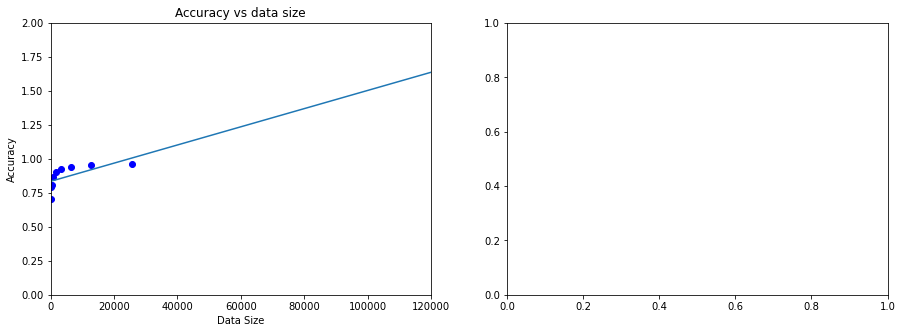

In [106]:
#def P4():

### STUDENT START ###
# Changing train_size list to a 2D array
train_sizes_trans = np.array(train_sizes).reshape(-1,1)

# Forming the linear regression model for accuracy prediction
linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(train_sizes_trans, accuracy_y)
# Determining the R^2 for the linear regression model
r_sq = linear_reg.score(train_sizes_trans, accuracy_y)
print("The coefficient of determination:", round(r_sq, 4))

# Determining the accuracy of new points using linear model
predict_sizes = np.array([1, 60000, 120000, 1000000]).reshape(-1,1)
reg_predict = linear_reg.predict(predict_sizes)
print("Predicted accuracies for [60000, 120000, 1000000]:",  np.round(reg_predict[1:], 3), sep="\n")

print("")
# Applying a transformation (log) to train_size
# linear_log = LinearRegression(fit_intercept=True).fit(np.log(train_sizes_trans), accuracy_y)

# r_sq_log = linear_log.score(np.log(train_sizes_trans), accuracy_y)
# print("The coefficient of determination:", round(r_sq_log, 4))

# reg_predict_log = linear_reg.predict(np.log(predict_sizes))
# print("Predicted accuracies for [60000, 120000, 1000000]:",  np.round(reg_predict_log[1:], 3), sep="\n")

# Making plots for both linear regression models
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1.scatter(train_sizes, accuracy_y, color="blue")
ax1.plot(predict_sizes, reg_predict)
ax1.set_xlim(0, 120000)
ax1.set_ylim(0, 2)
ax1.set_title("Accuracy vs data size")
ax1.set_ylabel("Accuracy")
ax1.set_xlabel("Data Size")

# ax2.scatter(np.log(np.array(train_sizes)), accuracy_y, color="green")
# ax2.scatter(np.log(predict_sizes), reg_predict_log, color="orange")
# ax2.plot(np.log(predict_sizes), reg_predict_log)
# ax2.set_title("Accuracy vs log(data size)")
# ax2.set_ylabel("Accuracy")
# ax2.set_xlabel("log(Data Size)")
plt.show()
### STUDENT END ###

#P4()

ANSWER:

### Part 5:

Produce a 1-Nearest Neighbor model and show the confusion matrix. Which pair of digits does the model confuse most often? Show the images of these most often confused digits.

Notes:
- Train on the mini train set.
- Evaluate performance on the dev set.
- You can use `confusion_matrix()` to produce a confusion matrix.

[[101   0   1   0   0   0   1   1   2   0]
 [  0 116   1   0   0   0   0   0   1   0]
 [  1   4  84   2   2   0   2   4   6   1]
 [  0   2   0  84   0   6   0   2   3   0]
 [  0   0   1   0  78   0   0   2   0  11]
 [  2   0   0   1   1  77   5   0   2   0]
 [  1   2   1   0   1   2  94   0   1   0]
 [  0   1   1   0   0   0   0  96   0   4]
 [  1   5   4   3   1   3   0   1  72   4]
 [  0   1   0   0   3   2   0   7   0  82]]


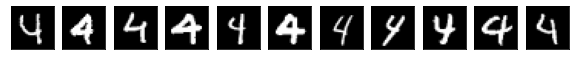

In [163]:
#def P5():

### STUDENT START ###
model_1 = KNeighborsClassifier(n_neighbors=1)
model_1.fit(mini_train_data, mini_train_labels)

model_predict_1 = model_1.predict(dev_data)
# Printing confusion matrix for our kNN model
print(confusion_matrix(dev_labels, model_predict_1))

# Obtaining locations for miss labeled 4s
miss_4 = []
for i in range(np.size(mini_train_labels)):
    if dev_labels[i] == '4' and model_predict_1[i] == '9':
        miss_4.append(i)
    else:
        continue

# Graphing the mislabeled 4s
fig, axs = plt.subplots(1,len(miss_4), sharey=True, figsize = (10, 2))
plt.setp(axs, xticks=[], yticks=[])
x = 0
for k in miss_4:
    image = dev_data[k]
    img_shape = image.reshape(28, 28)
    axs[x].imshow(img_shape, cmap="gray", aspect="equal")
    x += 1

### STUDENT END ###

#P5()

ANSWER: 

### Part 6:

A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian, i.e., the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels like this: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values.

Apply your blur filter in 3 ways:
- Filter the training data but not the dev data
- Filter the dev data but not the training data
- Filter both training data and dev data

Show the accuracy resulting no filter and from each way you apply the filter.

Notes:
* Train on the (filtered) mini train set.
* Evaluate performance on the (filtered) dev set.
* There are Guassian blur filters available, for example in `scipy.ndimage.filters`. You are welcome to experiment with those, but you are likely to get the best results with the simplified version described above.

In [165]:
#def P6():
    
### STUDENT START ###


# No filter model
model = KNeighborsClassifier(n_neighbors=1).fit(mini_train_data, mini_train_labels)
predict_labels = model.predict(dev_data)
num_wrong = np.sum(predict_labels != dev_labels)
print("Accuracy of no filter model:", round(1-(num_wrong/np.size(dev_labels)), 3))

# Train data filtered model


### STUDENT END ###

#P6()

Accuracy of no filter model: 0.884


### Part 7:

Produce two Naive Bayes models and evaluate their performances.  Recall that Naive Bayes estimates P(feature|label), where each label is a categorical, not a real number.

For the first model, map pixel values to either 0 or 1, representing white or black - you should pre-process the data or use `BernoulliNB`'s `binarize` parameter.  Use some reasonable threshold to separate white from black.  Use `BernoulliNB` to produce the model.

For the second model, map pixel values to either 0, 1, or 2, representing white, gray, or black - you should pre-process the data.  Use some reasonable thresholds to separate white from gray from black.  Use `MultinomialNB` to produce the model. 

Show the Bernoulli model accuracy and the Multinomial model accuracy.

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* `sklearn`'s Naive Bayes methods can handle real numbers, but for this exercise explicitly do the mapping to categoricals. 

Does the multinomial version improve the results? Why or why not?

In [ ]:
#def P7():

### STUDENT START ###


    
### STUDENT END ###

#P7()

ANSWER:

### Part 8:

Search across several values for the LaPlace smoothing parameter (alpha) to find its effect on a Bernoulli Naive Bayes model's performance.  Show the accuracy at each alpha value.

Notes:
* Train on the mini train set.
* Vary alpha and evaulate performance using `GridSearchCV` to cross-validate.
* Cross-validation is based on partitions of the training data, so results will be a bit different than if you used the dev set to evaluate performance.

What is the best value for alpha? What is the accuracy when alpha is near 0? Is this what you'd expect?

In [ ]:
#def P8(alphas):

### STUDENT START ###



### STUDENT END ###

# alphas = {'alpha': [1.0e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
# nb = P8(alphas)
# print()
# print("Best alpha = ", nb.best_params_)

ANSWER:

### Part 9:

Produce a model using Guassian Naive Bayes, which is intended for real-valued features, and evaluate performance. You will notice that it does not work so well. Diagnose the problem and apply a simple fix so that the model accuracy is around the same as for a Bernoulli Naive Bayes model. Show the model accuracy before your fix and the model accuracy after your fix.  Explain your solution.

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* Consider the effects of theta and sigma.  These are stored in the model's `theta_` and `sigma_` attributes.

In [ ]:
#def P9():

### STUDENT END ###


### STUDENT END ###

#P9()

ANSWER:

### Part 10:

Because Naive Bayes produces a generative model, you can use it to generate digit images.

Produce a Bernoulli Naive Bayes model and then use it to generate a 10x20 grid with 20 example images of each digit. Each pixel output should be either 0 or 1, based on comparing some randomly generated number to the estimated probability of the pixel being either 0 or 1.  Show the grid.

Notes:
* You can use np.random.rand() to generate random numbers from a uniform distribution.
* The estimated probability of each pixel being 0 or 1 is stored in the model's `feature_log_prob_` attribute. You can use `np.exp()` to convert a log probability back to a probability.

How do the generated digit images compare to the training digit images?

In [ ]:
#def P10(num_examples):

### STUDENT START ###


### STUDENT END ###

#P10(20)

ANSWER:

### Part 11:

Recall that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior probability of the predicted class is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior probability and accuracy.  

Produce a Bernoulli Naive Bayes model.  Evaluate performance: partition the dev set into several buckets based on the posterior probabilities of the predicted classes - think of a bin in a histogram- and then estimate the accuracy for each bucket. So, for each prediction, find the bucket to which the maximum posterior probability belongs, and update "correct" and "total" counters accordingly.  Show the accuracy for each bucket.

Notes:
* Train on the mini train set.
* Evaluate perfromance on the dev set.
* Apply a reasonable Laplace smoothing (alpha) value.

How would you characterize the calibration for this Bernoulli Naive Bayes model?

In [ ]:
#def P11(buckets, correct, total):
    
### STUDENT START ###


                
### STUDENT END ###

# buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
# correct = [0 for i in buckets]
# total = [0 for i in buckets]

# P11(buckets, correct, total)

# for i in range(len(buckets)):
#     accuracy = 0.0
#     if (total[i] > 0): accuracy = correct[i] / total[i]
#     print('p(pred) is %.13f to %.13f    total = %3d    accuracy = %.3f' % (0 if i==0 else buckets[i-1], buckets[i], total[i], accuracy))

ANSWER:

### Part 12 EXTRA CREDIT:

Design new features to see if you can produce a Bernoulli Naive Bayes model with better performance.  Show the accuracy of a model based on the original features and the accuracy of the model based on the new features.

Here are a few ideas to get you started:
- Try summing or averaging the pixel values in each row.
- Try summing or averaging the pixel values in each column.
- Try summing or averaging the pixel values in each square block. (pick various block sizes)
- Try counting the number of enclosed regions. (8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0)

Notes:
* Train on the mini train set (enhanced to comprise the new features).
* Evaulate performance on the dev set.
* Ensure that your code is well commented.

In [ ]:
#def P12():

### STUDENT START ###


### STUDENT END ###

#P12()